# Inferring species trees with *tetrad*

When you install _ipyrad_ a number of analysis tools are installed as well. This includes the program __tetrad__, which applies the theory of phylogenetic invariants (see Lake 1987) to infer quartet trees based on a SNP alignment. It then uses the software wQMC to join the quartets into a species tree. This combined approach was first developed by Chifman and Kubatko (2015) in the software *SVDQuartets*. 

In [18]:
import ipyrad.analysis as ipa
import ipyparallel as ipp

In [19]:
## connect to a cluster
ipyclient = ipp.Client()
print(len(ipyclient))

4


In [20]:
## initiate a tetrad object
tet = ipa.tetrad(
    name="pedic-full",
    seqfile="analysis-ipyrad/pedic-full_outfiles/pedic-full.snps.phy",
    mapfile="analysis-ipyrad/pedic-full_outfiles/pedic-full.snps.map",
    nboots=100,
    )

loading seq array [13 taxa x 14159 bp]
max unlinked SNPs per quartet (nloci): 2777


In [21]:
## run tetrad on the cluster
tet.run(ipyclient=ipyclient)

host compute node: [4 cores] on oud
inferring 715 induced quartet trees
[####################] 100%  initial tree | 0:00:00 |  
[####################] 100%  boot 100     | 0:01:05 |  


In [17]:
## plot the resulting unrooted tree
import toytree
tre = toytree.tree(tet.trees.cons)
tre.draw(
    width=350, 
    node_labels=tre.get_node_values("support"),
    );

33588_przewalskii 32082_przewalskii 30686_cyathophylla 29154_superba 41954_cyathophylloides 41478_cyathophylloides 33413_thamno 30556_thamno 35236_rex 35855_rex 40578_rex 38362_rex 39618_rex idx: 1
name: 1
dist: 100
support: 100 100 idx: 2
name: 2
dist: 100
support: 100 100 idx: 3
name: 3
dist: 100
support: 100 100 idx: 4
name: 4
dist: 100
support: 100 100 idx: 5
name: 5
dist: 100
support: 100 100 idx: 6
name: 6
dist: 80
support: 80 80 idx: 7
name: 7
dist: 50
support: 50 50 idx: 8
name: 8
dist: 32
support: 32 32 idx: 9
name: 9
dist: 100
support: 100 100 idx: 10
name: 10
dist: 100
support: 100 100 
 
 
 Save as .csv

In [22]:
### sample more bootstrap reps
tet.nboots = 150
tet.run(ipyclient=ipyclient)

host compute node: [4 cores] on oud
[####################] 100%  boot 150     | 0:00:33 |  


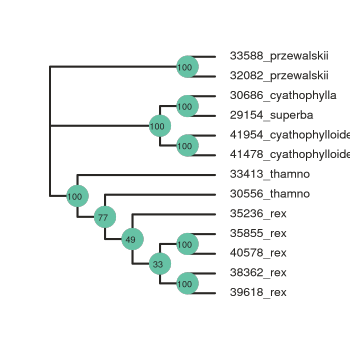

In [24]:
## plot updated tree
tre = toytree.tree(tet.trees.cons)
canvas, axes = tre.draw(
    width=350, 
    node_labels=tre.get_node_values("support"),
    );

## save the tree
import toyplot.pdf
toyplot.pdf.render(canvas, "tetrad-tree.pdf")

## and print into cell
canvas

### What does *tetrad* do differently from *svdquartets*?

Not too much currently. But we have plans to expand it. Importantly, however, the code is open source meaning that anybody can read it and contribute it, which is not the case for Paup\*. *tetrad* is also easier to install using conda and therefore easier to setup on an HPC cluster or local machine, and it can be parallelized across an arbitrarily large number of compute nodes while retaining a super small memory footprint.